In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("albums_all.csv")

### Attributes
* __ID:__ A unique identifier for every row
* __Name:__ Name of the album
* __Release Date:__ Release date of the album
* __Artists:__ All the artists of the album
* __Total_tracks:__ Number of total tracks of the album
* __T_name:__ Name of the track
* __Duration:__ Duration of the track (in ms)
* __Danceability:__ Danceability describes how suitable a track is for dancing based on a combination of musical elements.  A value of 0.0 is least danceable and 1.0 is the most danceable.
* __Energy:__ Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* __Key:__ The key the track is in. Integers map to pitches using standard Pitch
* __Mode:__ Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.-
* __Speechiness:__ Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* __Acousticness:__ A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* __Instrumentalness:__ Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* __Liveness:__ Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
* __Valence:__ A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* __Tempo:__ The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* __Time Signature:__ An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).


https://www.kaggle.com/elemento/getting-started-visualization

### Notes

* if we use the release_date of the albums as a feature, the dataset is highly skewed.

* Features for each track: [name, duration, valence, tempo, time signature...]

* Dummify categorical variables: mode, timesignature, key....

* Its the first 3 tracks in the albums, not the most popular ones

In [2]:
pd.options.display.max_columns = None
df.head()

,name,id,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,"""Fragtime"" Theme Song ""Fragile""",22352,2000,"Moritani Misuzu (CV:Miku Ito), Murakami Haruka...",4,Fragile,11:00a.m.,Fragile - Instrumental,292720,293760.0,292733.0,0.549,0.623,0.519,0.559,0.256,0.463,2.0,11.0,2.0,0.0,1.0,0.0,0.0256,0.0380,0.0253,0.5690,0.863000,0.077400,0.000000,0.000080,0.792000,0.0503,0.1100,0.0458,0.330,0.5390,0.1920,84.008,187.910,84.002,4.0,3.0,4.0,21
1,"""Green n' gold Hits""",106534,2011-09-16,"C.W.A. Cheeseheads With Attitude,",12,"""Packer Face"" (Everybody Vince Lombardi)","""I Love Green Bay"" (Player Mix)","""Beer Wit Da Bret""",213760,181000.0,245973.0,0.871,0.702,0.416,0.854,0.893,0.889,4.0,11.0,9.0,1.0,0.0,1.0,0.0420,0.0435,0.2760,0.0479,0.078600,0.004880,0.000011,0.000225,0.000000,0.0819,0.0687,0.1070,0.965,0.7830,0.3770,119.032,128.002,181.241,4.0,4.0,4.0,14
2,"""Zuhause Live: Das Laune der Natour-Finale"" pl...",23608,2019-03-29,"Die Toten Hosen,",59,Laune der Natur - das Intro - Live in Düsseldo...,Opel-Gang - Live in Düsseldorf 2018,Auswärtsspiel - Live in Düsseldorf 2018,157124,130446.0,152450.0,0.289,0.328,0.234,0.936,0.995,0.997,10.0,11.0,6.0,0.0,1.0,0.0,0.0845,0.1480,0.1280,0.2710,0.000204,0.000195,0.047100,0.000000,0.008280,0.8410,0.9590,0.5940,0.579,0.0475,0.0945,84.010,127.755,99.284,4.0,4.0,4.0,41
3,#Gsnls,8655,2020-08-02,"Surf'n,",8,Lock'n Legs,Capt'n Saven Em,Bloods & Crips,127896,176351.0,166968.0,0.886,0.947,0.826,0.818,0.629,0.694,7.0,8.0,11.0,1.0,1.0,1.0,0.0928,0.1890,0.2710,0.1050,0.386000,0.076700,0.000000,0.000000,0.000000,0.1800,0.1520,0.6880,0.624,0.3840,0.6510,100.053,99.999,95.017,4.0,4.0,4.0,1
4,#Hektarparty,49670,2018-09-21,"Die Draufgänger,",17,Die Hektar hat 2.0,Johnny Deere,Gina Lisa (Spiel mit deinen Glocken),210320,226253.0,211880.0,0.724,0.791,0.784,0.827,0.737,0.921,5.0,5.0,5.0,1.0,0.0,0.0,0.0283,0.1090,0.0445,0.0239,0.182000,0.092900,0.000000,0.000000,0.000008,0.1560,0.0592,0.1490,0.840,0.6650,0.5200,128.041,132.013,135.969,4.0,4.0,4.0,47


In [3]:
df.shape

(2833, 45)

In [4]:
df.columns

Index(['name', 'id', 'release_date', 'artists', 'total_tracks', 't_name0',
       't_name1', 't_name2', 't_dur0', 't_dur1', 't_dur2', 't_dance0',
       't_dance1', 't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0',
       't_key1', 't_key2', 't_mode0', 't_mode1', 't_mode2', 't_speech0',
       't_speech1', 't_speech2', 't_acous0', 't_acous1', 't_acous2', 't_ins0',
       't_ins1', 't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1',
       't_val2', 't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1',
       't_sig2', 'popularity'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2833 non-null   object 
 1   id            2833 non-null   int64  
 2   release_date  2833 non-null   object 
 3   artists       2833 non-null   object 
 4   total_tracks  2833 non-null   int64  
 5   t_name0       2833 non-null   object 
 6   t_name1       2833 non-null   object 
 7   t_name2       2833 non-null   object 
 8   t_dur0        2833 non-null   int64  
 9   t_dur1        2833 non-null   float64
 10  t_dur2        2833 non-null   float64
 11  t_dance0      2833 non-null   float64
 12  t_dance1      2833 non-null   float64
 13  t_dance2      2833 non-null   float64
 14  t_energy0     2833 non-null   float64
 15  t_energy1     2833 non-null   float64
 16  t_energy2     2833 non-null   float64
 17  t_key0        2833 non-null   float64
 18  t_key1        2833 non-null 

In [6]:
df[['t_dance0', 't_energy0', 't_tempo0']].describe()

,t_dance0,t_energy0,t_tempo0
count,2833.000000,2833.000000,2833.000000
mean,0.566969,0.587261,118.539867
std,0.193136,0.252315,31.564130
min,0.000000,0.000000,0.000000
25%,0.440000,0.409000,94.896000
50%,0.593000,0.618000,119.272000
75%,0.711000,0.792000,139.847000
max,0.977000,0.999000,219.551000


In [7]:
df['t_sig1'].unique()

array([3., 4., 5., 1., 0.])

In [8]:
df['t_sig0'].unique()

array([4., 3., 5., 1., 0.])

In [9]:
arr = df['popularity'].unique()
arr

array([21, 14, 41,  1, 47,  5,  3,  4, 61, 65, 10, 67, 15, 31, 20, 75, 42,
        8, 26, 40, 11, 36, 48, 39, 23, 13, 72, 53, 27, 30, 29, 37, 43, 32,
       33, 56, 46, 34, 54, 35, 77, 52, 51,  6, 17,  7, 25, 22, 18, 45,  9,
       55, 19, 50, 60, 62, 44, 28, 24,  2, 49, 59, 73, 74, 58, 71, 64, 57,
       38, 63, 79, 16, 66, 76, 69, 68, 12, 78, 98, 81, 82, 80, 70, 86, 83])

In [10]:
arr.size

85

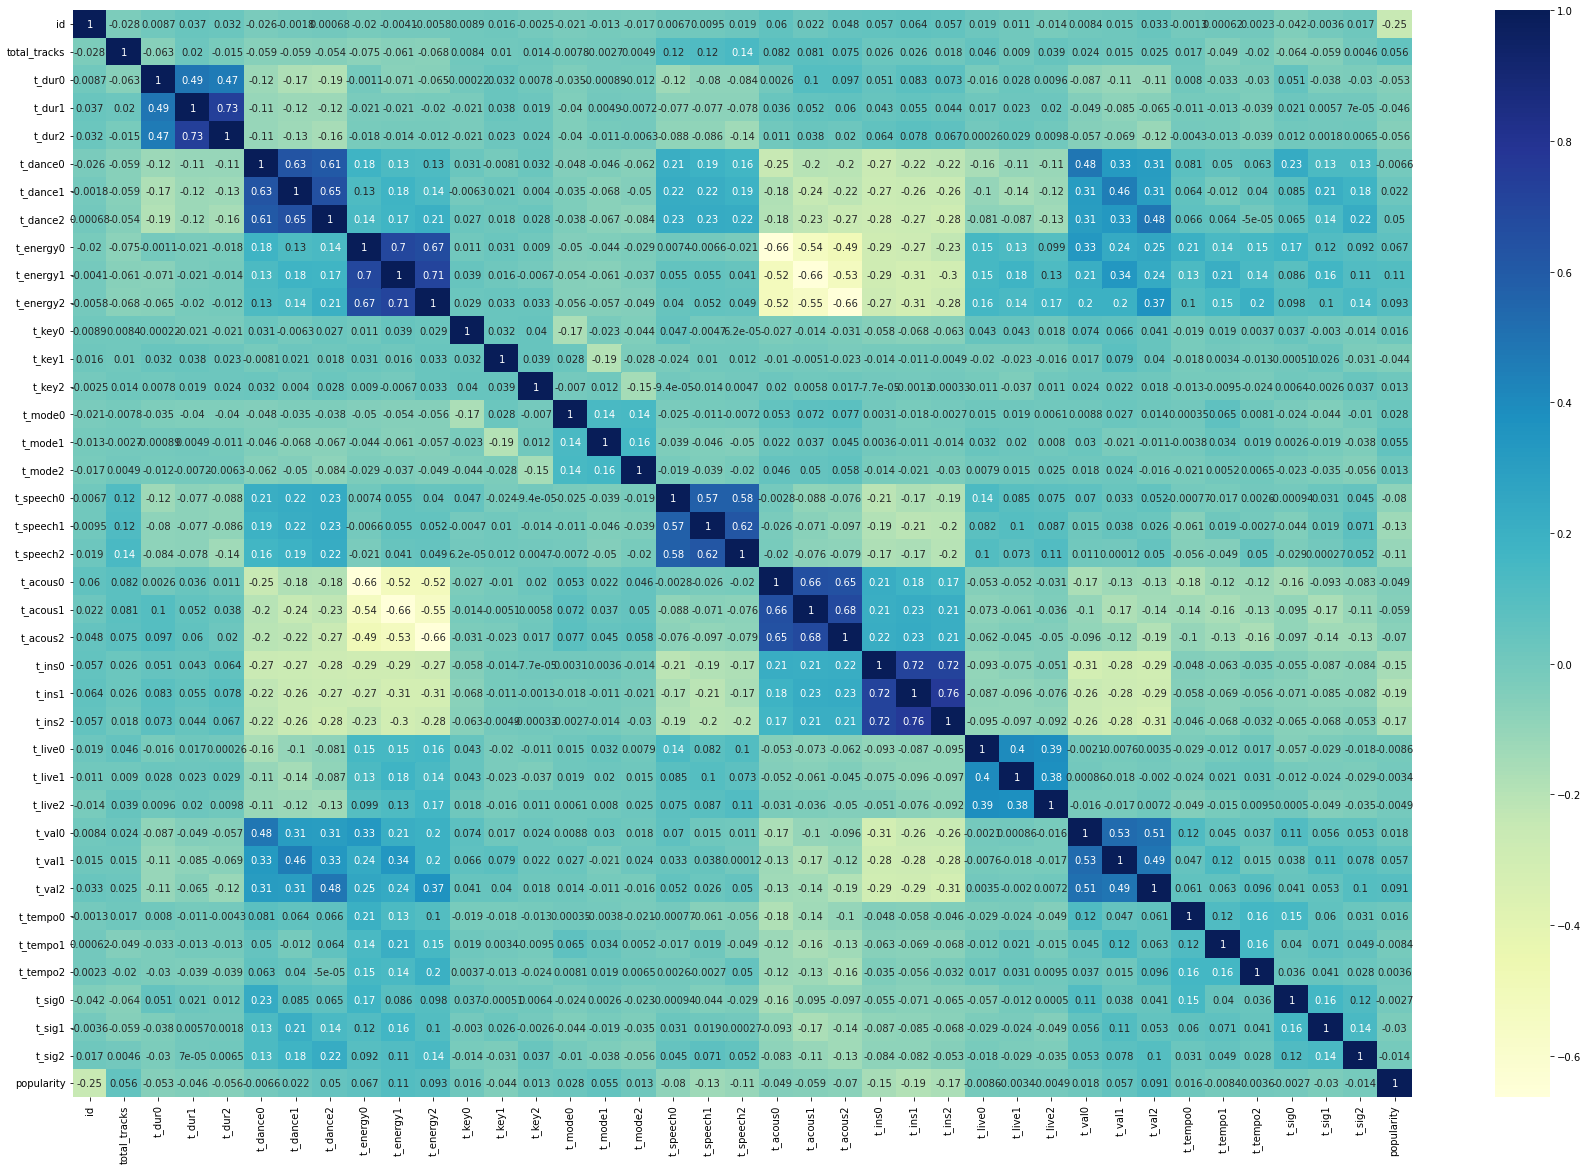

In [11]:
plt.figure(figsize=(30, 20))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [12]:
df.sort_values(by=['popularity'])

,name,id,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
957,Hinterhof,130311,2021-03-19,"Jzs,",6,Laid Back,Meine Jungs,Cream,96630,166750.0,93937.0,0.666,0.551,0.663,0.5370,0.537,0.773,9.0,8.0,10.0,0.0,0.0,0.0,0.4750,0.2990,0.0422,0.70300,0.73700,0.630000,0.000021,0.000304,0.000187,0.108,0.1180,0.0857,0.753,0.596,0.8670,92.008,87.002,130.044,4.0,5.0,4.0,1
2420,Unpop,112541,2008-11-11,"Yximalloo,",24,Peter Is Back,Linie Voezo,"Lav, Sucess and Helth",139786,375853.0,209626.0,0.704,0.851,0.917,0.1750,0.457,0.392,9.0,1.0,4.0,1.0,1.0,0.0,0.4430,0.4500,0.3190,0.43500,0.35000,0.000649,0.000000,0.345000,0.000000,0.478,0.0956,0.1230,0.352,0.265,0.3530,135.431,132.311,119.991,4.0,3.0,5.0,1
1362,M0xyy's House,32171,2020-04-17,"Jester Owl,",3,Big Time (M0xyy Song),Adhd Andy (Mizkif Song),Mizkif Disstrack,185024,104072.0,116059.0,0.927,0.858,0.821,0.4420,0.512,0.585,2.0,1.0,6.0,1.0,1.0,1.0,0.1230,0.2780,0.2820,0.06260,0.00715,0.051500,0.000000,0.000068,0.000000,0.057,0.0689,0.4890,0.634,0.697,0.4650,92.996,150.500,91.975,4.0,4.0,4.0,1
1978,Secret Weapon,23454,2021-06-23,"HNLTRAV,",15,Intro,Cap,Beat It Up,151389,112116.0,169744.0,0.910,0.633,0.827,0.4690,0.544,0.539,1.0,8.0,1.0,1.0,1.0,1.0,0.1930,0.2310,0.2810,0.03320,0.46400,0.006270,0.000383,0.000000,0.000000,0.108,0.1290,0.0914,0.479,0.552,0.3800,130.016,77.397,125.002,4.0,4.0,4.0,1
2748,revival,47260,2020-09-27,"PJJ,",8,perfect switch,dance & floor,vain,275679,173780.0,223840.0,0.523,0.643,0.760,0.8320,0.848,0.746,11.0,8.0,7.0,0.0,1.0,0.0,0.1800,0.0562,0.0565,0.23500,0.00503,0.578000,0.000025,0.001450,0.001680,0.125,0.1790,0.1150,0.347,0.517,0.6960,85.785,148.034,133.996,4.0,4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,MAP OF THE SOUL : 7,1257,2020-02-21,"BTS,",20,Intro : Persona,Boy With Luv (Feat. Halsey),Make It Right,171023,229773.0,226321.0,0.469,0.645,0.638,0.8700,0.862,0.703,9.0,11.0,7.0,0.0,0.0,1.0,0.3420,0.0965,0.4440,0.02780,0.09230,0.010400,0.000000,0.000000,0.000000,0.313,0.1920,0.1320,0.652,0.798,0.2610,86.622,119.991,105.766,4.0,4.0,4.0,82
1111,JORDI (Deluxe),5593,2021-06-11,"Maroon 5,",14,Beautiful Mistakes (feat. Megan Thee Stallion),Lost,Echo (feat. blackbear),227395,172597.0,178620.0,0.713,0.766,0.759,0.6760,0.706,0.670,10.0,7.0,1.0,1.0,0.0,1.0,0.0270,0.1600,0.0509,0.03770,0.22300,0.020400,0.000000,0.000280,0.000000,0.154,0.0640,0.0953,0.721,0.766,0.7410,99.048,142.989,136.027,4.0,4.0,4.0,83
1376,MONTERO (Call Me By Your Name),4547,2021-03-31,"Lil Nas X,",3,MONTERO (Call Me By Your Name),MONTERO (Call Me By Your Name) - SATAN'S EXTEN...,MONTERO (Call Me By Your Name) - But Lil Nas X...,137875,170054.0,168031.0,0.610,0.511,0.820,0.5080,0.540,0.545,8.0,8.0,8.0,0.0,0.0,0.0,0.1520,0.1740,0.6680,0.29700,0.19100,0.168000,0.000000,0.000000,0.886000,0.384,0.3770,0.3440,0.758,0.711,0.1400,178.818,119.248,178.997,4.0,5.0,4.0,86
967,Hollywood's Bleeding,36,2019-09-06,"Post Malone,",17,Hollywood's Bleeding,Saint-Tropez,Enemies (feat. DaBaby),156266,150866.0,196760.0,0.405,0.617,0.542,0.6460,0.684,0.674,4.0,0.0,6.0,0.0,1.0,1.0,0.0476,0.0439,0.2100,0.33100,0.05450,0.058800,0.000000,0.000000,0.000000,0.103,0.1040,0.0955,0.170,0.295,0.6670,130.218,132.113,76.388,4.0,4.0,4.0,86


/Users/jkhammerseth/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

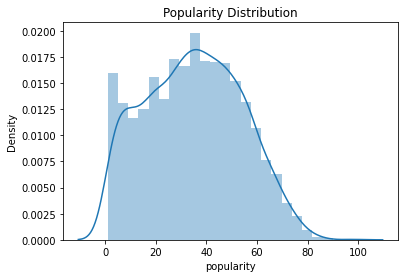

In [13]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')

In [14]:
# duration in minutes and not milliseconds. 
df['t_dur0_m'] = df['t_dur0']/60000
df['t_dur1_m'] = df['t_dur1']/60000
df['t_dur2_m'] = df['t_dur2']/60000
df = df.reindex(sorted(df.columns), axis=1)
df.columns

Index(['artists', 'id', 'name', 'popularity', 'release_date', 't_acous0',
       't_acous1', 't_acous2', 't_dance0', 't_dance1', 't_dance2', 't_dur0',
       't_dur0_m', 't_dur1', 't_dur1_m', 't_dur2', 't_dur2_m', 't_energy0',
       't_energy1', 't_energy2', 't_ins0', 't_ins1', 't_ins2', 't_key0',
       't_key1', 't_key2', 't_live0', 't_live1', 't_live2', 't_mode0',
       't_mode1', 't_mode2', 't_name0', 't_name1', 't_name2', 't_sig0',
       't_sig1', 't_sig2', 't_speech0', 't_speech1', 't_speech2', 't_tempo0',
       't_tempo1', 't_tempo2', 't_val0', 't_val1', 't_val2', 'total_tracks'],
      dtype='object')

In [15]:
df.drop(['t_dur0','t_dur1','t_dur2'], axis = 1, inplace = True)
df.columns

Index(['artists', 'id', 'name', 'popularity', 'release_date', 't_acous0',
       't_acous1', 't_acous2', 't_dance0', 't_dance1', 't_dance2', 't_dur0_m',
       't_dur1_m', 't_dur2_m', 't_energy0', 't_energy1', 't_energy2', 't_ins0',
       't_ins1', 't_ins2', 't_key0', 't_key1', 't_key2', 't_live0', 't_live1',
       't_live2', 't_mode0', 't_mode1', 't_mode2', 't_name0', 't_name1',
       't_name2', 't_sig0', 't_sig1', 't_sig2', 't_speech0', 't_speech1',
       't_speech2', 't_tempo0', 't_tempo1', 't_tempo2', 't_val0', 't_val1',
       't_val2', 'total_tracks'],
      dtype='object')

In [16]:
data = pd.get_dummies(df, columns=['t_sig0', 't_sig1', 't_sig2', 't_key0','t_key1','t_key2', 't_mode0','t_mode1', 't_mode2'], drop_first=True)
data.shape

(2833, 84)

In [17]:
data = data.reindex(sorted(data.columns), axis=1)
data.head(15)

,artists,id,name,popularity,release_date,t_acous0,t_acous1,t_acous2,t_dance0,t_dance1,t_dance2,t_dur0_m,t_dur1_m,t_dur2_m,t_energy0,t_energy1,t_energy2,t_ins0,t_ins1,t_ins2,t_key0_1.0,t_key0_10.0,t_key0_11.0,t_key0_2.0,t_key0_3.0,t_key0_4.0,t_key0_5.0,t_key0_6.0,t_key0_7.0,t_key0_8.0,t_key0_9.0,t_key1_1.0,t_key1_10.0,t_key1_11.0,t_key1_2.0,t_key1_3.0,t_key1_4.0,t_key1_5.0,t_key1_6.0,t_key1_7.0,t_key1_8.0,t_key1_9.0,t_key2_1.0,t_key2_10.0,t_key2_11.0,t_key2_2.0,t_key2_3.0,t_key2_4.0,t_key2_5.0,t_key2_6.0,t_key2_7.0,t_key2_8.0,t_key2_9.0,t_live0,t_live1,t_live2,t_mode0_1.0,t_mode1_1.0,t_mode2_1.0,t_name0,t_name1,t_name2,t_sig0_1.0,t_sig0_3.0,t_sig0_4.0,t_sig0_5.0,t_sig1_1.0,t_sig1_3.0,t_sig1_4.0,t_sig1_5.0,t_sig2_1.0,t_sig2_3.0,t_sig2_4.0,t_sig2_5.0,t_speech0,t_speech1,t_speech2,t_tempo0,t_tempo1,t_tempo2,t_val0,t_val1,t_val2,total_tracks
0,"Moritani Misuzu (CV:Miku Ito), Murakami Haruka...",22352,"""Fragtime"" Theme Song ""Fragile""",21,2000,0.569000,0.863000,0.077400,0.549,0.623,0.519,4.878667,4.896000,4.878883,0.559,0.256,0.463,0.000000,0.000080,0.792000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0503,0.1100,0.0458,0,1,0,Fragile,11:00a.m.,Fragile - Instrumental,0,0,1,0,0,1,0,0,0,0,1,0,0.0256,0.0380,0.0253,84.008,187.910,84.002,0.3300,0.5390,0.1920,4
1,"C.W.A. Cheeseheads With Attitude,",106534,"""Green n' gold Hits""",14,2011-09-16,0.047900,0.078600,0.004880,0.871,0.702,0.416,3.562667,3.016667,4.099550,0.854,0.893,0.889,0.000011,0.000225,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0819,0.0687,0.1070,1,0,1,"""Packer Face"" (Everybody Vince Lombardi)","""I Love Green Bay"" (Player Mix)","""Beer Wit Da Bret""",0,0,1,0,0,0,1,0,0,0,1,0,0.0420,0.0435,0.2760,119.032,128.002,181.241,0.9650,0.7830,0.3770,12
2,"Die Toten Hosen,",23608,"""Zuhause Live: Das Laune der Natour-Finale"" pl...",41,2019-03-29,0.271000,0.000204,0.000195,0.289,0.328,0.234,2.618733,2.174100,2.540833,0.936,0.995,0.997,0.047100,0.000000,0.008280,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.8410,0.9590,0.5940,0,1,0,Laune der Natur - das Intro - Live in Düsseldo...,Opel-Gang - Live in Düsseldorf 2018,Auswärtsspiel - Live in Düsseldorf 2018,0,0,1,0,0,0,1,0,0,0,1,0,0.0845,0.1480,0.1280,84.010,127.755,99.284,0.5790,0.0475,0.0945,59
3,"Surf'n,",8655,#Gsnls,1,2020-08-02,0.105000,0.386000,0.076700,0.886,0.947,0.826,2.131600,2.939183,2.782800,0.818,0.629,0.694,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.1800,0.1520,0.6880,1,1,1,Lock'n Legs,Capt'n Saven Em,Bloods & Crips,0,0,1,0,0,0,1,0,0,0,1,0,0.0928,0.1890,0.2710,100.053,99.999,95.017,0.6240,0.3840,0.6510,8
4,"Die Draufgänger,",49670,#Hektarparty,47,2018-09-21,0.023900,0.182000,0.092900,0.724,0.791,0.784,3.505333,3.770883,3.531333,0.827,0.737,0.921,0.000000,0.000000,0.000008,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.1560,0.0592,0.1490,1,0,0,Die Hektar hat 2.0,Johnny Deere,Gina Lisa (Spiel mit deinen Glocken),0,0,1,0,0,0,1,0,0,0,1,0,0.0283,0.1090,0.0445,128.041,132.013,135.969,0.8400,0.6650,0.5200,17
5,"Lil Xelly,",101988,#RB&BR,5,2021-06-26,0.001310,0.422000,0.000187,0.715,0.667,0.619,1.714367,2.018383,2.400133,0.528,0.697,0.404,0.000000,0.000000,0.152000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0570,0.1000,0.1710,1,0,0,#RB&BR,hoodrixh,Elm St 2,0,0,1,0,0,0,1,0,0,0,1,0,0.2610,0.2320,0.1320,133.066,127.196,135.028,0.6050,0.6200,0.1860,5
6,"Xcursion,",9136,#TBX,5,2019-09-06,0.022800,0.140000,0.168000,0.599,0.617,0.649,2.645333,4.150417,4.370717,0.670,0.588,0.655,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.1030,0.3570,0.2650,1,0,1,All I Know,"Playa, Playa","Right Hand Man, Pt. 2",0,0,1,0,0,0,1,0,0,0,1,0,0.2580,0.2990,0.3550,94.132,85.434,88.028,0.5850,0.3590,0.2990,7
7,"Total Fucking Destruction,",141284,#usa4tfd,3,2019-07-12,0.000004,0.000004,0.000003,0.287,0.300,0.168,0.613767,1.316883,1.48843

In [34]:
# take only year from release date
df['release_date'] = df['release_date'].str[:4]

,artists,id,name,popularity,release_date,t_acous0,t_acous1,t_acous2,t_dance0,t_dance1,t_dance2,t_dur0_m,t_dur1_m,t_dur2_m,t_energy0,t_energy1,t_energy2,t_ins0,t_ins1,t_ins2,t_key0,t_key1,t_key2,t_live0,t_live1,t_live2,t_mode0,t_mode1,t_mode2,t_name0,t_name1,t_name2,t_sig0,t_sig1,t_sig2,t_speech0,t_speech1,t_speech2,t_tempo0,t_tempo1,t_tempo2,t_val0,t_val1,t_val2,total_tracks
0,"Moritani Misuzu (CV:Miku Ito), Murakami Haruka...",22352,"""Fragtime"" Theme Song ""Fragile""",21,2000,0.5690,0.863000,0.077400,0.549,0.623,0.5190,4.878667,4.896000,4.878883,0.559,0.256,0.463,0.000000,0.000080,0.792000,2.0,11.0,2.0,0.0503,0.1100,0.0458,0.0,1.0,0.0,Fragile,11:00a.m.,Fragile - Instrumental,4.0,3.0,4.0,0.0256,0.0380,0.0253,84.008,187.910,84.002,0.3300,0.5390,0.1920,4
1,"C.W.A. Cheeseheads With Attitude,",106534,"""Green n' gold Hits""",14,2011,0.0479,0.078600,0.004880,0.871,0.702,0.4160,3.562667,3.016667,4.099550,0.854,0.893,0.889,0.000011,0.000225,0.000000,4.0,11.0,9.0,0.0819,0.0687,0.1070,1.0,0.0,1.0,"""Packer Face"" (Everybody Vince Lombardi)","""I Love Green Bay"" (Player Mix)","""Beer Wit Da Bret""",4.0,4.0,4.0,0.0420,0.0435,0.2760,119.032,128.002,181.241,0.9650,0.7830,0.3770,12
2,"Die Toten Hosen,",23608,"""Zuhause Live: Das Laune der Natour-Finale"" pl...",41,2019,0.2710,0.000204,0.000195,0.289,0.328,0.2340,2.618733,2.174100,2.540833,0.936,0.995,0.997,0.047100,0.000000,0.008280,10.0,11.0,6.0,0.8410,0.9590,0.5940,0.0,1.0,0.0,Laune der Natur - das Intro - Live in Düsseldo...,Opel-Gang - Live in Düsseldorf 2018,Auswärtsspiel - Live in Düsseldorf 2018,4.0,4.0,4.0,0.0845,0.1480,0.1280,84.010,127.755,99.284,0.5790,0.0475,0.0945,59
3,"Surf'n,",8655,#Gsnls,1,2020,0.1050,0.386000,0.076700,0.886,0.947,0.8260,2.131600,2.939183,2.782800,0.818,0.629,0.694,0.000000,0.000000,0.000000,7.0,8.0,11.0,0.1800,0.1520,0.6880,1.0,1.0,1.0,Lock'n Legs,Capt'n Saven Em,Bloods & Crips,4.0,4.0,4.0,0.0928,0.1890,0.2710,100.053,99.999,95.017,0.6240,0.3840,0.6510,8
4,"Die Draufgänger,",49670,#Hektarparty,47,2018,0.0239,0.182000,0.092900,0.724,0.791,0.7840,3.505333,3.770883,3.531333,0.827,0.737,0.921,0.000000,0.000000,0.000008,5.0,5.0,5.0,0.1560,0.0592,0.1490,1.0,0.0,0.0,Die Hektar hat 2.0,Johnny Deere,Gina Lisa (Spiel mit deinen Glocken),4.0,4.0,4.0,0.0283,0.1090,0.0445,128.041,132.013,135.969,0.8400,0.6650,0.5200,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,"Pika Chiu,",33980,邱振哲<遠行的太陽>首張創作專輯,47,2018,0.4600,0.327000,0.340000,0.224,0.609,0.7110,1.179000,4.373333,3.678000,0.348,0.595,0.730,0.844000,0.000000,0.000000,8.0,3.0,11.0,0.1470,0.1270,0.1060,1.0,1.0,0.0,遠行(intro),太陽,兩分鐘,3.0,4.0,4.0,0.0494,0.0325,0.0459,68.712,124.081,129.056,0.0931,0.2270,0.5140,10
2829,"WeiBird,",110832,韋禮安首張同名全創作專輯,40,2010,0.1720,0.113000,0.146000,0.526,0.623,0.4820,4.203767,3.706667,3.582883,0.293,0.689,0.669,0.000000,0.000000,0.000000,7.0,2.0,2.0,0.2330,0.1100,0.0661,1.0,1.0,1.0,有沒有,兩腳書櫥的逃亡,故事,3.0,4.0,4.0,0.0293,0.0307,0.0295,113.940,93.018,96.983,0.2130,0.4020,0.5590,10
2830,"Jay Chou,",14491,魔杰座,55,2008,0.0189,0.272000,0.120000,0.551,0.756,0.7820,4.485767,4.192667,2.879333,0.901,0.635,0.779,0.038100,0.000000,0.030100,2.0,1.0,9.0,0.1070,0.1460,0.0867,0.0,1.0,1.0,龍戰騎士,給我一首歌的時間,蛇 舞,4.0,4.0,4.0,0.0731,0.0282,0.0431,115.978,118.004,107.972,0.3240,0.5190,0.6730,11
2831,"Lee Sang-Eun,",123511,신비체험,21,2003,0.9180,0.963000,0.687000,0.473,0.572,0.8230,5.746067,7.093550,4.160867,0.146,0.219,0.541,0.000062,0.007030,0.000000,9.0,8.0,6.0,0.1950,0.1460,0.1550,0.0,1.0,1.0,Soulmate,The World Is An Orchestra,비밀의 화원,4.0,4.0,4.0,0.0301,0.0558,0.0333,155.832,137.969,111.066,0.2070,0.2720,0.7980,13


In [29]:
X = data.drop(['popularity', 't_name0','t_name1','t_name2','artists','id','name','release_date'], axis=1)
y = data['popularity']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [22]:
y_predict = knn.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)

0.018518518518518517

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy_score(y_predicted, y_test)

/Users/jkhammerseth/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.021164021164021163

In [25]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)
accuracy_score(y_predicted, y_test)

/Users/jkhammerseth/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets